In [15]:
from keras.models import load_model
import numpy as np
import tensorflow as tf
from scipy import spatial
import matplotlib.pyplot as plt

In [ ]:
model = load_model("Sauvegarde modèle/model_sauvegarde")
representation = load_model("Sauvegarde modèle/simi_sauvegarde")

In [52]:
img = np.load("Sauvegarde modèle/img.npy")
label = np.load("Sauvegarde modèle/label.npy")
Class = np.load("Sauvegarde modèle/class.npy")
simi = np.load("Sauvegarde modèle/representation.npy")

In [4]:
pred = model.predict(image_batch)
pred = pred.argmax(axis=1)[0]

In [5]:
pred

0

In [53]:
def similarite(nb,quer):
    distance,index = spatial.KDTree(simi).query(quer,k=nb+1)  
    plt.imshow(np.squeeze(img[index[0]]))
    distance = distance[1:]
    index = index[1:]
    #plt.show()
    plt.figure(figsize=(10,10))
    for n in range(len(index)):
          ax = plt.subplot(5,5,n+1)
          plt.imshow(np.squeeze(img[index[n]]))
          plt.title(Class[label[index[n]]==1][0].title())
          plt.axis('off')
    plt.show()

(1024,)


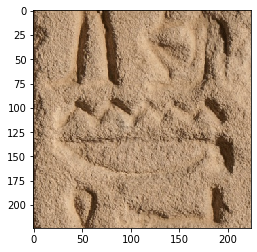

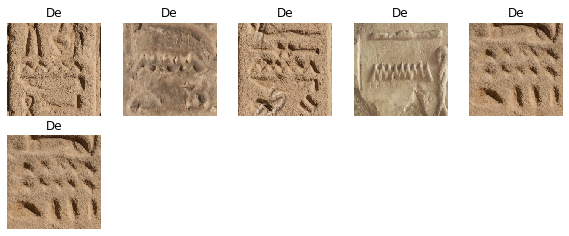

In [55]:
image = np.expand_dims(img[5], axis=0) # selection de l'image auquelle il faut trouver les images similaire
quer = representation.predict(image)[0]
nb = 6
similarite(nb,quer)